<a href="https://colab.research.google.com/github/BrahmaTeja7/Dissertation_DBS/blob/main/Fake_News_Prediction_using_TfIdf_Vectorizer_10fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries for finding the accuracy of the selected Machine learning models in predicting the fake news.**

In [ ]:
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score, precision_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from scipy.stats import uniform, randint,expon
import time


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Loading the Dataset using Pandas Library**

In [ ]:
dataset = pd.read_csv('/content/Fake&True_News.csv')

# **Preliminary Checks**

In [ ]:
dataset.shape

(44867, 5)

### **Shuffling the dataset row set records**

In [ ]:
shuffled_dataset = dataset.sample(frac=1.0)
print(shuffled_dataset)

                                                   title  \
35032  South Sudan government, rebel groups sign ceas...   
3564    Man STORMS Pizza Joint With A Gun After Fake ...   
38648  South Korea says will provide financial suppor...   
23343  CRIMINAL: Details Emerge of Washington’s ‘Fast...   
41087  Hyatt Hotels discovers card data breach at 41 ...   
...                                                  ...   
36705  Pope says his defense of Rohingya got through ...   
8708    Ted Cruz Gets Trapped In Elevator – Tells Hil...   
9532   FAMILY FEUD? Why President Trump Is Reportedly...   
42474  China says situation on Korean peninsula very ...   
28501  Highlights: The Trump presidency on March 8 at...   

                                                    text       subject  \
35032  ADDIS ABABA (Reuters) - South Sudan s governme...     worldnews   
3564   Donald Trump s fans are idiots   and this time...          News   
38648  SEOUL (Reuters) - South Korea will provide add... 

### **Creating a new column "label" to convert the values of True or False to 0 & 1.**

In [ ]:
shuffled_dataset['label'] = np.where(shuffled_dataset['marker'] == True, 0, 1)
print(shuffled_dataset)

                                                   title  \
35032  South Sudan government, rebel groups sign ceas...   
3564    Man STORMS Pizza Joint With A Gun After Fake ...   
38648  South Korea says will provide financial suppor...   
23343  CRIMINAL: Details Emerge of Washington’s ‘Fast...   
41087  Hyatt Hotels discovers card data breach at 41 ...   
...                                                  ...   
36705  Pope says his defense of Rohingya got through ...   
8708    Ted Cruz Gets Trapped In Elevator – Tells Hil...   
9532   FAMILY FEUD? Why President Trump Is Reportedly...   
42474  China says situation on Korean peninsula very ...   
28501  Highlights: The Trump presidency on March 8 at...   

                                                    text       subject  \
35032  ADDIS ABABA (Reuters) - South Sudan s governme...     worldnews   
3564   Donald Trump s fans are idiots   and this time...          News   
38648  SEOUL (Reuters) - South Korea will provide add... 

**Converting the text to lowercase**

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['text'].str.lower()
print(shuffled_dataset)

                                                   title  \
35032  South Sudan government, rebel groups sign ceas...   
3564    Man STORMS Pizza Joint With A Gun After Fake ...   
38648  South Korea says will provide financial suppor...   
23343  CRIMINAL: Details Emerge of Washington’s ‘Fast...   
41087  Hyatt Hotels discovers card data breach at 41 ...   
...                                                  ...   
36705  Pope says his defense of Rohingya got through ...   
8708    Ted Cruz Gets Trapped In Elevator – Tells Hil...   
9532   FAMILY FEUD? Why President Trump Is Reportedly...   
42474  China says situation on Korean peninsula very ...   
28501  Highlights: The Trump presidency on March 8 at...   

                                                    text       subject  \
35032  ADDIS ABABA (Reuters) - South Sudan s governme...     worldnews   
3564   Donald Trump s fans are idiots   and this time...          News   
38648  SEOUL (Reuters) - South Korea will provide add... 

**Removing the Punctuations in the text**

In [ ]:
def removing_punctuations(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_punctuations(x))
print(shuffled_dataset)

                                                   title  \
35032  South Sudan government, rebel groups sign ceas...   
3564    Man STORMS Pizza Joint With A Gun After Fake ...   
38648  South Korea says will provide financial suppor...   
23343  CRIMINAL: Details Emerge of Washington’s ‘Fast...   
41087  Hyatt Hotels discovers card data breach at 41 ...   
...                                                  ...   
36705  Pope says his defense of Rohingya got through ...   
8708    Ted Cruz Gets Trapped In Elevator – Tells Hil...   
9532   FAMILY FEUD? Why President Trump Is Reportedly...   
42474  China says situation on Korean peninsula very ...   
28501  Highlights: The Trump presidency on March 8 at...   

                                                    text       subject  \
35032  ADDIS ABABA (Reuters) - South Sudan s governme...     worldnews   
3564   Donald Trump s fans are idiots   and this time...          News   
38648  SEOUL (Reuters) - South Korea will provide add... 

**Removing the stopwords in text column**

In [ ]:
Stopword = set(stopwords.words('english'))
def removing_stopwords(text):
  return " ".join([word for word in text.split() if word not in Stopword])

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_stopwords(x))
print(shuffled_dataset)

                                                   title  \
35032  South Sudan government, rebel groups sign ceas...   
3564    Man STORMS Pizza Joint With A Gun After Fake ...   
38648  South Korea says will provide financial suppor...   
23343  CRIMINAL: Details Emerge of Washington’s ‘Fast...   
41087  Hyatt Hotels discovers card data breach at 41 ...   
...                                                  ...   
36705  Pope says his defense of Rohingya got through ...   
8708    Ted Cruz Gets Trapped In Elevator – Tells Hil...   
9532   FAMILY FEUD? Why President Trump Is Reportedly...   
42474  China says situation on Korean peninsula very ...   
28501  Highlights: The Trump presidency on March 8 at...   

                                                    text       subject  \
35032  ADDIS ABABA (Reuters) - South Sudan s governme...     worldnews   
3564   Donald Trump s fans are idiots   and this time...          News   
38648  SEOUL (Reuters) - South Korea will provide add... 

**Removing the special Characters, Html tags, Url in text column**

In [ ]:
def remove_chars_url_htmlTags(text):
  text = re.sub('[^a-zA-Z0-9]', ' ',text)
  text = re.sub('\s+', ' ',text)
  text = re.sub(r'https?://\S+|www\.\S+','',text)
  text = re.sub(r'<.*?>','',text)
  return text

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: remove_chars_url_htmlTags(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text
35032,"South Sudan government, rebel groups sign ceas...",ADDIS ABABA (Reuters) - South Sudan s governme...,worldnews,21-Dec-17,True,0,addis ababa reuters south sudan government reb...
3564,Man STORMS Pizza Joint With A Gun After Fake ...,Donald Trump s fans are idiots and this time...,News,04-Dec-16,False,1,donald trump fans idiots time could gotten peo...
38648,South Korea says will provide financial suppor...,SEOUL (Reuters) - South Korea will provide add...,worldnews,10-Nov-17,True,0,seoul reuters south korea provide additional f...
23343,CRIMINAL: Details Emerge of Washington’s ‘Fast...,21st Century Wire says No doubt about it. In c...,Middle-east,13-Apr-16,False,1,21st century wire says doubt comparison washin...
41087,Hyatt Hotels discovers card data breach at 41 ...,(Reuters) - Hyatt Hotels Corp (H.N) said on Th...,worldnews,12-Oct-17,True,0,reuters hyatt hotels corp hn said thursday dis...


In [ ]:
from collections import Counter
word_count = Counter()
for text in shuffled_dataset['processing_text']:
  for word in text.split():
    word_count[word]+= 1

word_count.most_common(1000)


[('said', 129916),
 ('trump', 127445),
 ('us', 62760),
 ('s', 54953),
 ('would', 54736),
 ('president', 51795),
 ('people', 41065),
 ('one', 35213),
 ('state', 31967),
 ('also', 30851),
 ('new', 30677),
 ('reuters', 28764),
 ('donald', 27496),
 ('clinton', 27189),
 ('house', 27013),
 ('obama', 26905),
 ('government', 26657),
 ('states', 25935),
 ('republican', 24293),
 ('could', 23774),
 ('united', 23394),
 ('told', 23317),
 ('white', 22124),
 ('like', 21947),
 ('campaign', 21041),
 ('last', 20369),
 ('news', 19830),
 ('two', 19828),
 ('party', 19750),
 ('time', 19453),
 ('election', 19355),
 ('first', 18420),
 ('washington', 17706),
 ('former', 17572),
 ('year', 17451),
 ('even', 17424),
 ('country', 17404),
 ('many', 16227),
 ('hillary', 16134),
 ('years', 15878),
 ('security', 15545),
 ('may', 15343),
 ('say', 15179),
 ('national', 15123),
 ('political', 14975),
 ('made', 14825),
 ('media', 14820),
 ('get', 14680),
 ('law', 14628),
 ('police', 14505),
 ('make', 14489),
 ('court', 14

In [ ]:
Rare_words = set(word for (word, wc) in word_count.most_common()[:-100:-1])
Rare_words

{'2014compare',
 '2016dem',
 '2016independent',
 '2016protestors',
 '45whgovxpfszu',
 'addskushner',
 'agreethat',
 'ahlong',
 'americacompare',
 'approvalthings',
 'arcturus',
 'armyrussia',
 'arreston',
 'azarya',
 'azraya',
 'blogdear',
 'boulaalam',
 'btselem',
 'candidacylots',
 'chargesrather',
 'chiefjohnmina',
 'conditionwhile',
 'conmy',
 'consequenceswatch',
 'crookedused803',
 'dancohen3000',
 'differenceregardschris',
 'doublepronged',
 'electionreuters',
 'entitlementnonetheless',
 'executionersoldier',
 'existencehe',
 'fairon',
 'forded',
 'forma',
 'generationfeatured',
 'gentlewoman',
 'gizzi',
 'himselftalk',
 'housemuch',
 'housesaying',
 'httpstcodpwduqsizb',
 'httpstcoeagsgn9gem',
 'httpstcokunbf8qf8a',
 'httpstcosjiy3pfayj',
 'httpswwwyoutubecomwatchvpbl9zam5a4thousands',
 'immigrationforinvestment',
 'intelligenti',
 'investorsjust',
 'iowaunfortunately',
 'jarhni',
 'johngizzi',
 'jute',
 'kremlinrussia',
 'markand',
 'mediacalling',
 'midvale',
 'moinuddin',
 '

**Initializing Porter Stemmer function and applying stemming to reduce the text to their root word**

In [ ]:
port_stemming = PorterStemmer()

In [ ]:
def stemming(text):
  return " ".join([port_stemming.stem(word) for word in text.split()])

In [ ]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['processing_text'].apply(lambda x: stemming(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text,stemmed_text
35032,"South Sudan government, rebel groups sign ceas...",ADDIS ABABA (Reuters) - South Sudan s governme...,worldnews,21-Dec-17,True,0,addis ababa reuters south sudan government reb...,addi ababa reuter south sudan govern rebel gro...
3564,Man STORMS Pizza Joint With A Gun After Fake ...,Donald Trump s fans are idiots and this time...,News,04-Dec-16,False,1,donald trump fans idiots time could gotten peo...,donald trump fan idiot time could gotten peopl...
38648,South Korea says will provide financial suppor...,SEOUL (Reuters) - South Korea will provide add...,worldnews,10-Nov-17,True,0,seoul reuters south korea provide additional f...,seoul reuter south korea provid addit financi ...
23343,CRIMINAL: Details Emerge of Washington’s ‘Fast...,21st Century Wire says No doubt about it. In c...,Middle-east,13-Apr-16,False,1,21st century wire says doubt comparison washin...,21st centuri wire say doubt comparison washing...
41087,Hyatt Hotels discovers card data breach at 41 ...,(Reuters) - Hyatt Hotels Corp (H.N) said on Th...,worldnews,12-Oct-17,True,0,reuters hyatt hotels corp hn said thursday dis...,reuter hyatt hotel corp hn said thursday disco...


**Tokenizing the words in the text column**

In [ ]:
def token(text):
  return word_tokenize(text)

In [ ]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['stemmed_text'].apply(lambda x: token(x))
print(shuffled_dataset)

                                                   title  \
35032  South Sudan government, rebel groups sign ceas...   
3564    Man STORMS Pizza Joint With A Gun After Fake ...   
38648  South Korea says will provide financial suppor...   
23343  CRIMINAL: Details Emerge of Washington’s ‘Fast...   
41087  Hyatt Hotels discovers card data breach at 41 ...   
...                                                  ...   
36705  Pope says his defense of Rohingya got through ...   
8708    Ted Cruz Gets Trapped In Elevator – Tells Hil...   
9532   FAMILY FEUD? Why President Trump Is Reportedly...   
42474  China says situation on Korean peninsula very ...   
28501  Highlights: The Trump presidency on March 8 at...   

                                                    text       subject  \
35032  ADDIS ABABA (Reuters) - South Sudan s governme...     worldnews   
3564   Donald Trump s fans are idiots   and this time...          News   
38648  SEOUL (Reuters) - South Korea will provide add... 

**Removing unused columns from the dataset**

In [ ]:
shuffled_dataset = shuffled_dataset.drop(['date','marker'],axis=1)
shuffled_dataset

,title,text,subject,label,processing_text,stemmed_text
35032,"South Sudan government, rebel groups sign ceas...",ADDIS ABABA (Reuters) - South Sudan s governme...,worldnews,0,addis ababa reuters south sudan government reb...,"[addi, ababa, reuter, south, sudan, govern, re..."
3564,Man STORMS Pizza Joint With A Gun After Fake ...,Donald Trump s fans are idiots and this time...,News,1,donald trump fans idiots time could gotten peo...,"[donald, trump, fan, idiot, time, could, gotte..."
38648,South Korea says will provide financial suppor...,SEOUL (Reuters) - South Korea will provide add...,worldnews,0,seoul reuters south korea provide additional f...,"[seoul, reuter, south, korea, provid, addit, f..."
23343,CRIMINAL: Details Emerge of Washington’s ‘Fast...,21st Century Wire says No doubt about it. In c...,Middle-east,1,21st century wire says doubt comparison washin...,"[21st, centuri, wire, say, doubt, comparison, ..."
41087,Hyatt Hotels discovers card data breach at 41 ...,(Reuters) - Hyatt Hotels Corp (H.N) said on Th...,worldnews,0,reuters hyatt hotels corp hn said thursday dis...,"[reuter, hyatt, hotel, corp, hn, said, thursda..."
...,...,...,...,...,...,...
36705,Pope says his defense of Rohingya got through ...,ABOARD THE PAPAL PLANE (Reuters) - Pope Franci...,worldnews,0,aboard papal plane reuters pope francis saturd...,"[aboard, papal, plane, reuter, pope, franci, s..."
8708,Ted Cruz Gets Trapped In Elevator – Tells Hil...,"If you haven t heard by now, Ted Cruz was stuc...",News,1,heard ted cruz stuck inside elevator scheduled...,"[heard, ted, cruz, stuck, insid, elev, schedul..."
9532,FAMILY FEUD? Why President Trump Is Reportedly...,Is the last man standing in the West Wing abou...,politics,1,last man standing west wing packing bags accor...,"[last, man, stand, west, wing, pack, bag, acco..."
42474,China says situation on Korean peninsula very ...,BEIJING (Reuters) - The situation on the Korea...,worldnews,0,beijing reuters situation korean peninsula dan...,"[beij, reuter, situat, korean, peninsula, dang..."


**Creating Train and Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_dataset.text, shuffled_dataset.label, test_size=0.25)

In [ ]:
print('X_train:', X_train.shape,
      'X_test:', X_test.shape,
      'y_train:', y_train.shape,
      'y_test:', y_test.shape)


X_train: (33650,) X_test: (11217,) y_train: (33650,) y_test: (11217,)


**Applying TfIdf Vectorizer**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.values)
#y_train = shuffled_dataset.label

In [ ]:
X_train_tfidf

<33650x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 7874473 stored elements in Compressed Sparse Row format>

**Creating Vocabulary to store the words**

In [ ]:
tfidf_vocabulary = tfidf_vectorizer.get_feature_names_out()

print(tfidf_vocabulary)

['000' '000 people' '10' ... 'zero' 'zone' 'zuma']


In [ ]:
print(X_train_tfidf[15].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


# **Initializing the selected Machine learning models**

In [ ]:
svm_model = SVC()
nb_model = MultinomialNB()
xgb_model = xgb.XGBClassifier()

# **Defining Hyperparameters for selected Machine learning algorithms**

In [ ]:
svm_param_distributions = {'C': uniform(0.7, 1), 'kernel': ['linear']}
nb_param_distributions = {'alpha': uniform(0.5, 10)}
xgb_param_distributions = {'n_estimators': randint(50, 100), 'max_depth': randint(3, 8)}

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# **Multinomial Naive Bayes**

In [ ]:
random_search = RandomizedSearchCV(estimator=nb_model, param_distributions=nb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [ ]:
start_time_MNB_training = time.time()

random_search.fit(X_train_tfidf, y_train)

end_time_MNB_training = time.time()
elapsed_time_MNB_training = end_time_MNB_training - start_time_MNB_training



Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [ ]:
print(f"Time taken: {elapsed_time_MNB_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 4.800135135650635 seconds
Best Parameters:  {'alpha': 0.5011437481734489}
Best Accuracy:  0.9502526002971768


In [ ]:
start_time_MNB_testing = time.time()

X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = random_search.predict(X_test_tfidf)


accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Multinomial Naive Bayes :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_MNB_testing = time.time()
elapsed_time_MNB_testing = end_time_MNB_testing - start_time_MNB_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_MNB_testing} seconds")

Accuracy score for Multinomial Naive Bayes : 0.9512347329945618

******************************************************

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5299
           1       0.95      0.95      0.95      5918

    accuracy                           0.95     11217
   macro avg       0.95      0.95      0.95     11217
weighted avg       0.95      0.95      0.95     11217


******************************************************

Time taken: 11.391874551773071 seconds


Confusion Matrix:
[[5027  272]
 [ 275 5643]]


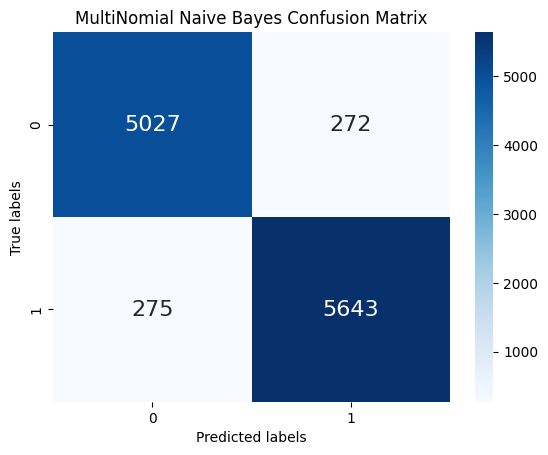

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('MultiNomial Naive Bayes Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
print(X_test_tfidf)

  (0, 4959)	0.06912079822490026
  (0, 4930)	0.04215014655068685
  (0, 4901)	0.06646873422662884
  (0, 4890)	0.04820671405153867
  (0, 4879)	0.057305479244396225
  (0, 4878)	0.05614966172748833
  (0, 4872)	0.06624606495377162
  (0, 4866)	0.04443635770456313
  (0, 4851)	0.04423360048500975
  (0, 4845)	0.038486677128810834
  (0, 4844)	0.06450557347366964
  (0, 4842)	0.034850989314682626
  (0, 4841)	0.03125006977266909
  (0, 4838)	0.029069569837431836
  (0, 4802)	0.05062138795528732
  (0, 4800)	0.02466939219138937
  (0, 4781)	0.03246276662157559
  (0, 4778)	0.03602109934115574
  (0, 4753)	0.04957676041643521
  (0, 4750)	0.021652230006911792
  (0, 4737)	0.03717833834781524
  (0, 4735)	0.029453872953974152
  (0, 4718)	0.017159315951971094
  (0, 4680)	0.04967073814171068
  (0, 4582)	0.06055552227550611
  :	:
  (11216, 413)	0.031064964438367444
  (11216, 412)	0.028240666089280178
  (11216, 409)	0.04167309146403649
  (11216, 407)	0.02305832902262345
  (11216, 389)	0.03438473285921746
  (11216, 

**Prediction**

In [ ]:
X_predict = X_test_tfidf[0]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


In [ ]:
X_predict = X_test_tfidf[16]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


# **XGboost**

In [ ]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [ ]:
start_time_xgb_training = time.time()

random_search.fit(X_train_tfidf, y_train)

end_time_xgb_training = time.time()
elapsed_time_xgb_training = end_time_xgb_training - start_time_xgb_training


Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [ ]:
print(f"Time taken: {elapsed_time_xgb_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 638.8576002120972 seconds
Best Parameters:  {'max_depth': 6, 'n_estimators': 62}
Best Accuracy:  0.9978603268945022


In [ ]:
start_time_xgb_testing = time.time()


X_test_bow = tfidf_vectorizer.transform(X_test)
y_pred = random_search.predict(X_test_bow)



accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Xgboost :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_xgb_testing = time.time()
elapsed_time_xgb_testing = end_time_xgb_testing - start_time_xgb_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_xgb_testing} seconds")

Accuracy score for Xgboost : 0.9980386912721761

******************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5299
           1       1.00      1.00      1.00      5918

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217


******************************************************

Time taken: 11.585501670837402 seconds


Confusion Matrix:
[[5285   14]
 [   8 5910]]


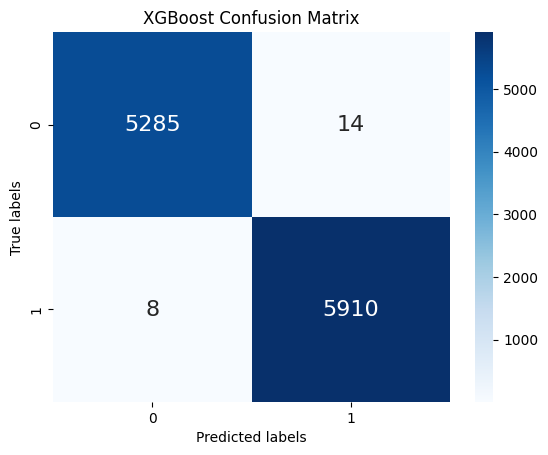

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGBoost Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
print(X_test_tfidf)

  (0, 4959)	0.06912079822490026
  (0, 4930)	0.04215014655068685
  (0, 4901)	0.06646873422662884
  (0, 4890)	0.04820671405153867
  (0, 4879)	0.057305479244396225
  (0, 4878)	0.05614966172748833
  (0, 4872)	0.06624606495377162
  (0, 4866)	0.04443635770456313
  (0, 4851)	0.04423360048500975
  (0, 4845)	0.038486677128810834
  (0, 4844)	0.06450557347366964
  (0, 4842)	0.034850989314682626
  (0, 4841)	0.03125006977266909
  (0, 4838)	0.029069569837431836
  (0, 4802)	0.05062138795528732
  (0, 4800)	0.02466939219138937
  (0, 4781)	0.03246276662157559
  (0, 4778)	0.03602109934115574
  (0, 4753)	0.04957676041643521
  (0, 4750)	0.021652230006911792
  (0, 4737)	0.03717833834781524
  (0, 4735)	0.029453872953974152
  (0, 4718)	0.017159315951971094
  (0, 4680)	0.04967073814171068
  (0, 4582)	0.06055552227550611
  :	:
  (11216, 413)	0.031064964438367444
  (11216, 412)	0.028240666089280178
  (11216, 409)	0.04167309146403649
  (11216, 407)	0.02305832902262345
  (11216, 389)	0.03438473285921746
  (11216, 

In [ ]:
X_predict = X_test_tfidf[1]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


In [ ]:
X_predict = X_test_tfidf[15]

prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


# **Support Vector Machine**

In [ ]:
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [ ]:
start_time_svm_training = time.time()

random_search.fit(X_train_tfidf, y_train)


end_time_svm_training = time.time()
elapsed_time_svm_training = end_time_svm_training - start_time_svm_training

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [ ]:
print(f"Time taken: {elapsed_time_svm_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 15280.000742435455 seconds
Best Parameters:  {'C': 1.1170220047025738, 'kernel': 'linear'}
Best Accuracy:  0.994888558692422


In [ ]:
start_time_svm_testing = time.time()


X_test_tfidf= tfidf_vectorizer.transform(X_test)
y_pred = random_search.predict(X_test_tfidf)


accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Support Vector Machine :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_svm_testing = time.time()
elapsed_time_svm_testing = end_time_svm_testing - start_time_svm_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_svm_testing} seconds")

Accuracy score for Support Vector Machine : 0.9955424801640367

******************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5299
           1       1.00      1.00      1.00      5918

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217


******************************************************

Time taken: 88.24885201454163 seconds


Confusion Matrix:
[[5273   26]
 [  24 5894]]


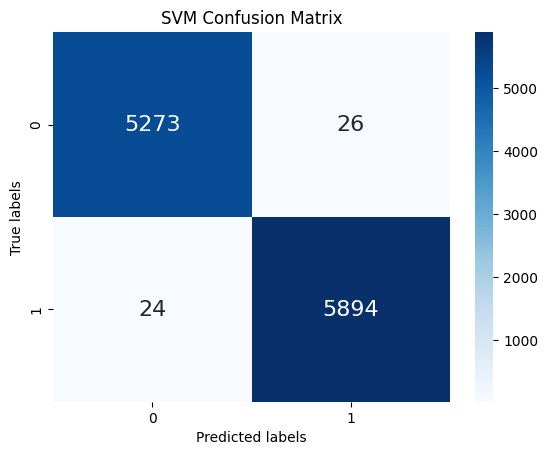

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
print(X_test_tfidf)

  (0, 8)	0.04715241174299546
  (0, 10)	0.05410066074607172
  (0, 11)	0.053379074453296295
  (0, 12)	0.057477668435458096
  (0, 118)	0.08184276838739953
  (0, 150)	0.04493417131527063
  (0, 180)	0.060858118727415776
  (0, 252)	0.15139418590344317
  (0, 270)	0.050730686277338566
  (0, 288)	0.0657883072009015
  (0, 294)	0.05124849969433701
  (0, 307)	0.06141809039464075
  (0, 321)	0.05861637463242562
  (0, 358)	0.019421194651310494
  (0, 378)	0.05365182538311638
  (0, 389)	0.017146498729795925
  (0, 414)	0.060987694598100384
  (0, 434)	0.01814000490993289
  (0, 439)	0.05838837664294199
  (0, 452)	0.05675545697247958
  (0, 556)	0.06111859269437707
  (0, 558)	0.04172976376384877
  (0, 639)	0.06659413016283915
  (0, 698)	0.02626429446271601
  (0, 755)	0.0547146463987861
  :	:
  (11216, 4788)	0.030967244730272816
  (11216, 4793)	0.01584371428300757
  (11216, 4800)	0.03298051198546486
  (11216, 4807)	0.08655536753532325
  (11216, 4826)	0.05069797944794036
  (11216, 4830)	0.015207657593477149
 

**Prediction**

In [ ]:
X_predict = X_test_tfidf[0]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


In [ ]:
X_predict = X_test_tfidf[16]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


# **ROC Graph**

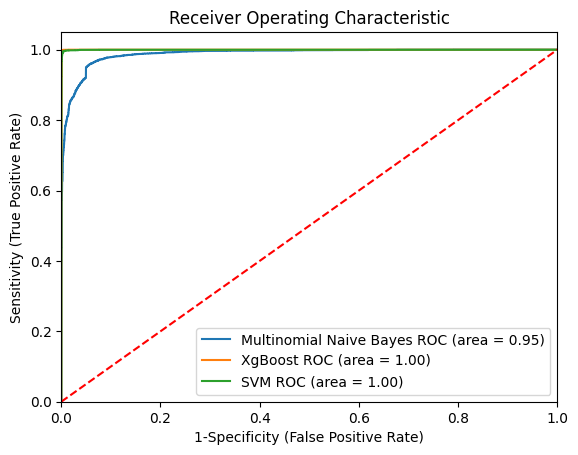

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
    {
        'label': 'Multinomial Naive Bayes',
        'model': MultinomialNB(),
    },
    {
        'label': 'XgBoost',
        'model': xgb.XGBClassifier(),
    },
    {
        'label': 'SVM',
        'model': SVC(probability=True),  # Set probability=True for SVC
    }
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']  # select the model
    model.fit(X_train_tfidf, y_train)  # train the model
    y_pred = model.predict(X_test_tfidf)  # predict the test data

    # Compute False positive rate, and True positive rate
    if hasattr(model, "predict_proba"):
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
    else:
        # For models that don't have predict_proba, use decision function
        decision_values = model.decision_function(X_test_tfidf)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, decision_values)

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, y_pred)

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  # Display

# **Comparing the training time and testing time among selected models**

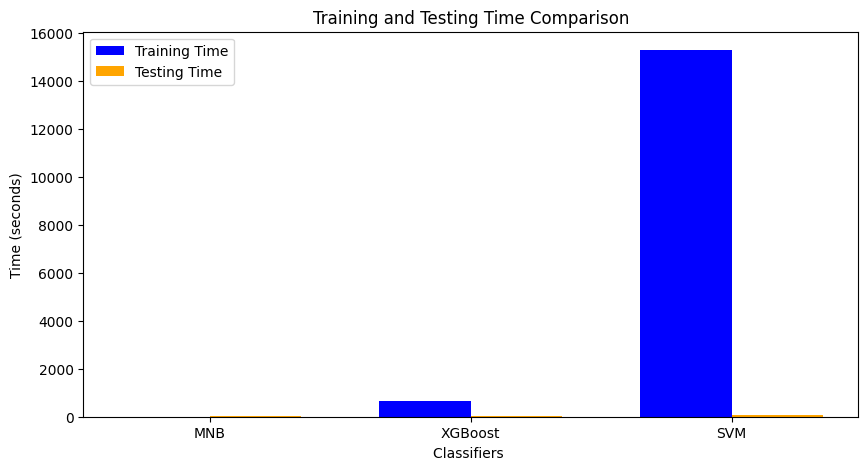

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['MNB', 'XGBoost', 'SVM']
training_times = [elapsed_time_MNB_training, elapsed_time_xgb_training, elapsed_time_svm_training]  # Replace with actual training times in seconds
testing_times = [elapsed_time_MNB_testing,elapsed_time_xgb_testing,elapsed_time_svm_testing]      # Replace with actual testing times in seconds

# Plotting both training and testing times in the same plot
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(10, 5))
plt.bar(index, training_times, width=bar_width, color='blue', label='Training Time')
plt.bar(index + bar_width, testing_times, width=bar_width, color='orange', label='Testing Time')
plt.xlabel('Classifiers ')
plt.ylabel('Time (seconds)')
plt.title('Training and Testing Time Comparison')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()